<a href="https://colab.research.google.com/github/red21steven/Plant-Disease-Prediction-Using-CNN/blob/main/Plant_Disease_Prediction_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plant Disease Prediction Using CNN


In this project I've created a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. 

I've used different layers and other hyperparameters for building, training and testing this classifictaion model.

I've used tensorflow and keras for this project.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'Colab Notebooks'   Plant_images_pianalytix   plant_model_weights.h5
 plant_disease.h5   plant_model.json


In [ ]:
!pip install keras

## Importing the needed libraries / packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Ploting 12 of the images with the help of matplotlib to observe the images

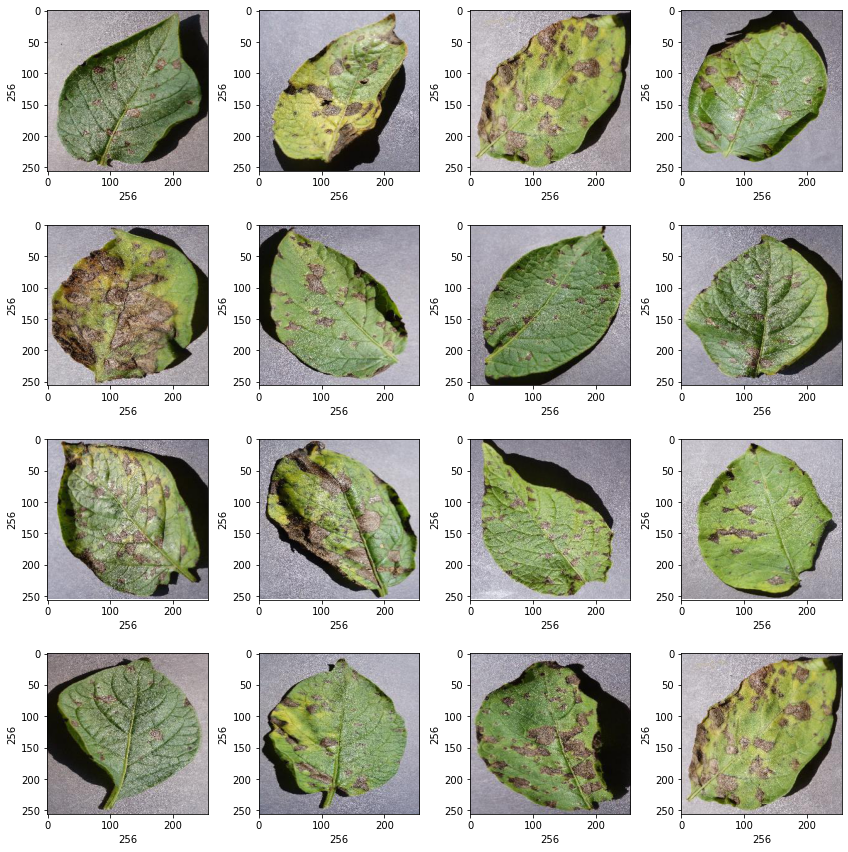

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Personal projects/Plant disease prediction Collab Code/Data/Plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. 

It's required because we need to normalize them.

In [ ]:
#Converting Images to array 
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))  
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Now the images in the directory will be normalize with the help of above the created function.

In [ ]:
dir = "/content/drive/MyDrive/Personal projects/Plant disease prediction Collab Code/Data/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

Observing the number of images under different classes to see if the dataset is balanced or not

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

Observing the shape of the image.

In [ ]:
image_list[0].shape

(256, 256, 3)

Checking the total number of the images which is the length of the labels list.

In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

I've used sklearn train_test_split to split the dataset into testing and training data. 

Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Now I've normalized the dataset containing the images. 

As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Creating a network architecture for the model. 

I've used different types of layers according to their features namely 

**Conv_2d** (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), 

**max_pooling2d** (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), 

**flatten** (It flattens the input and creates a 1D output), 

**Dense** (Dense layer produce the output as the dot product of input and kernel).


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 225800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 2

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

spliting the dataset into validation and training data.

In [ ]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. 

training the model with 10 epochs with a batch size of 128. 

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 33s 461ms/step - loss: 1.0645 - accuracy: 0.4045 - val_loss: 1.0214 - val_accuracy: 0.6389
Epoch 2/50
5/5 [==============================] - 1s 200ms/step - loss: 0.9910 - accuracy: 0.5799 - val_loss: 0.9332 - val_accuracy: 0.6111
Epoch 3/50
5/5 [==============================] - 1s 196ms/step - loss: 0.9023 - accuracy: 0.5764 - val_loss: 0.8397 - val_accuracy: 0.6458
Epoch 4/50
5/5 [==============================] - 1s 192ms/step - loss: 0.8088 - accuracy: 0.6493 - val_loss: 0.7430 - val_accuracy: 0.7014
Epoch 5/50
5/5 [==============================] - 1s 196ms/step - loss: 0.7072 - accuracy: 0.6962 - val_loss: 0.6399 - val_accuracy: 0.6944
Epoch 6/50
5/5 [==============================] - 1s 198ms/step - loss: 0.6044 - accuracy: 0.8142 - val_loss: 0.5455 - val_accuracy: 0.9514
Epoch 7/50
5/5 [==============================] - 1s 194ms/step - loss: 0.5140 - accuracy: 0.9705 - val_loss: 0.4600 - val_accuracy: 0.8958
Epoch 8/50
5/5 [===

Saving the model using different techniques.

In [ ]:
model.save("/content/drive/MyDrive/Personal projects/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/MyDrive/Personal projects/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/MyDrive/Personal projects/plant_model_weights.h5')

Next we will plot the accuracy of the model for the trainig history.

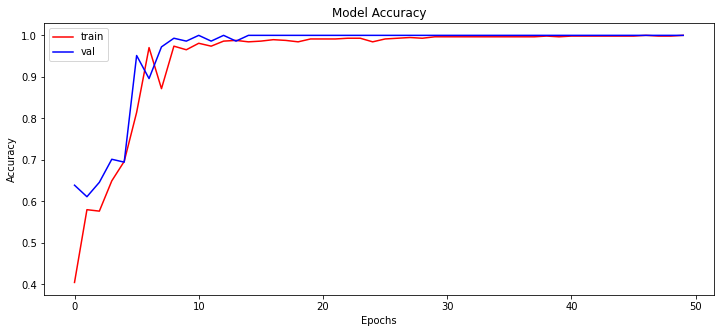

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Evaluating the model to know the accuracy of the model.


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 1s 60ms/step - loss: 0.0561 - accuracy: 0.9889
Test Accuracy: 98.88888597488403


Using the model to predict the testing dataset label.

In [ ]:
y_pred = model.predict(x_test)

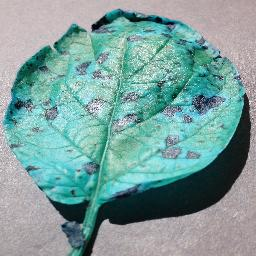

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [ ]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


Printing out the original and the predicted label.

# Summary

1. Started the project by loading the dataset into google colab using google drive and visualizing the images. 

2. Normalizing the dataset. 

3. After that I've created a CNN Model which is further used for predicting the plant diseases using the image supplied to model.

# Why Create This Model??

This model is highly beneficial and healpful for agricultural firms and farmers to increase their yield and minimize wastage of crops due to unwanted disease.